In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import pickle

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Open networks

In [2]:
G_random_erdos = nx.erdos_renyi_graph(170,0.12571,seed=0)
print(G_random_erdos)
print(nx.density(G_random_erdos))

Graph with 170 nodes and 1840 edges
0.1280891054646711


In [3]:
PCD_CCN = nx.read_edgelist('1 output\Consensus PCD')
print(PCD_CCN)

Graph with 170 nodes and 1840 edges


In [4]:
CHR_CCN = nx.read_edgelist('1 output\Consensus CHR')
print(CHR_CCN)

Graph with 162 nodes and 1297 edges


In [5]:
DNA_CCN = nx.read_edgelist('1 output\Consensus DNA')
print(DNA_CCN)

Graph with 233 nodes and 4616 edges


In [10]:
nx.diameter(G_random_erdos),nx.diameter(PCD_CCN)

(3, 5)

# Plotting 2D

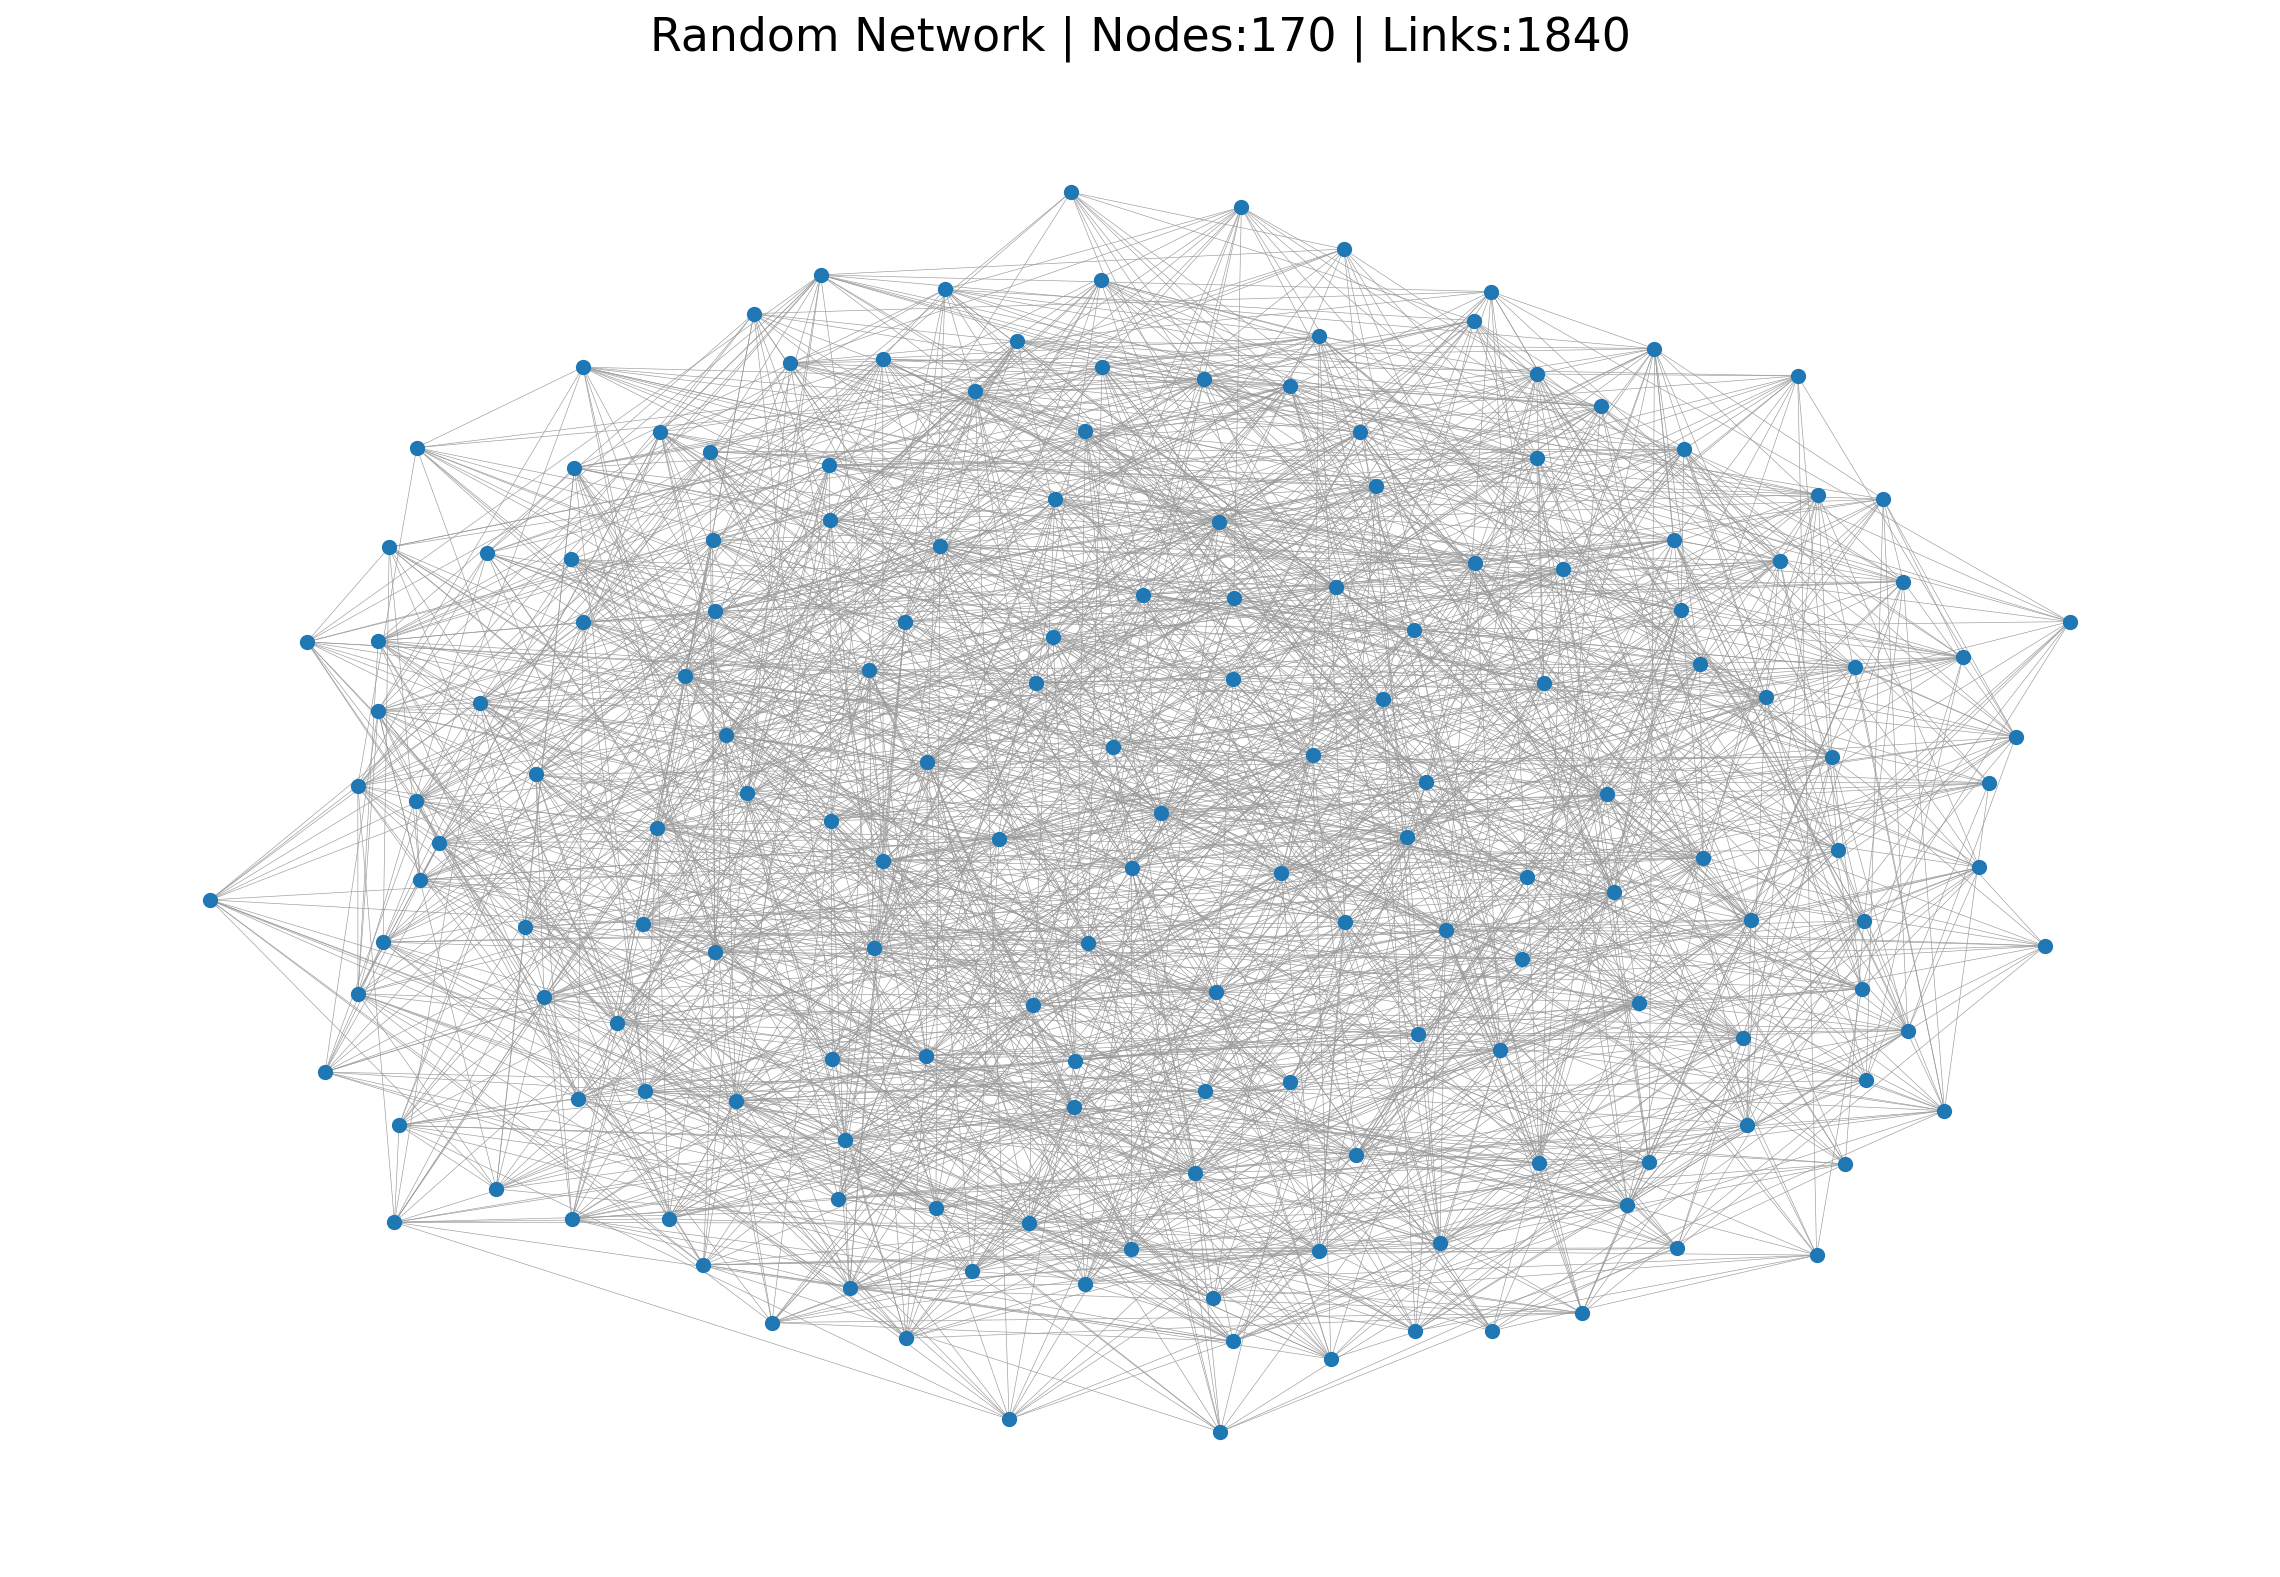

In [8]:
plt.figure(figsize=(15,10),dpi=150)
nx.draw_kamada_kawai(G_random_erdos,with_labels=0,node_size=40,width=0.3,edge_color='#999')
plt.title('Random Network | Nodes:'+str(len(G_random_erdos.nodes))+' | Links:'+str(len(G_random_erdos.edges)),fontsize=22)
plt.tight_layout()
plt.show()

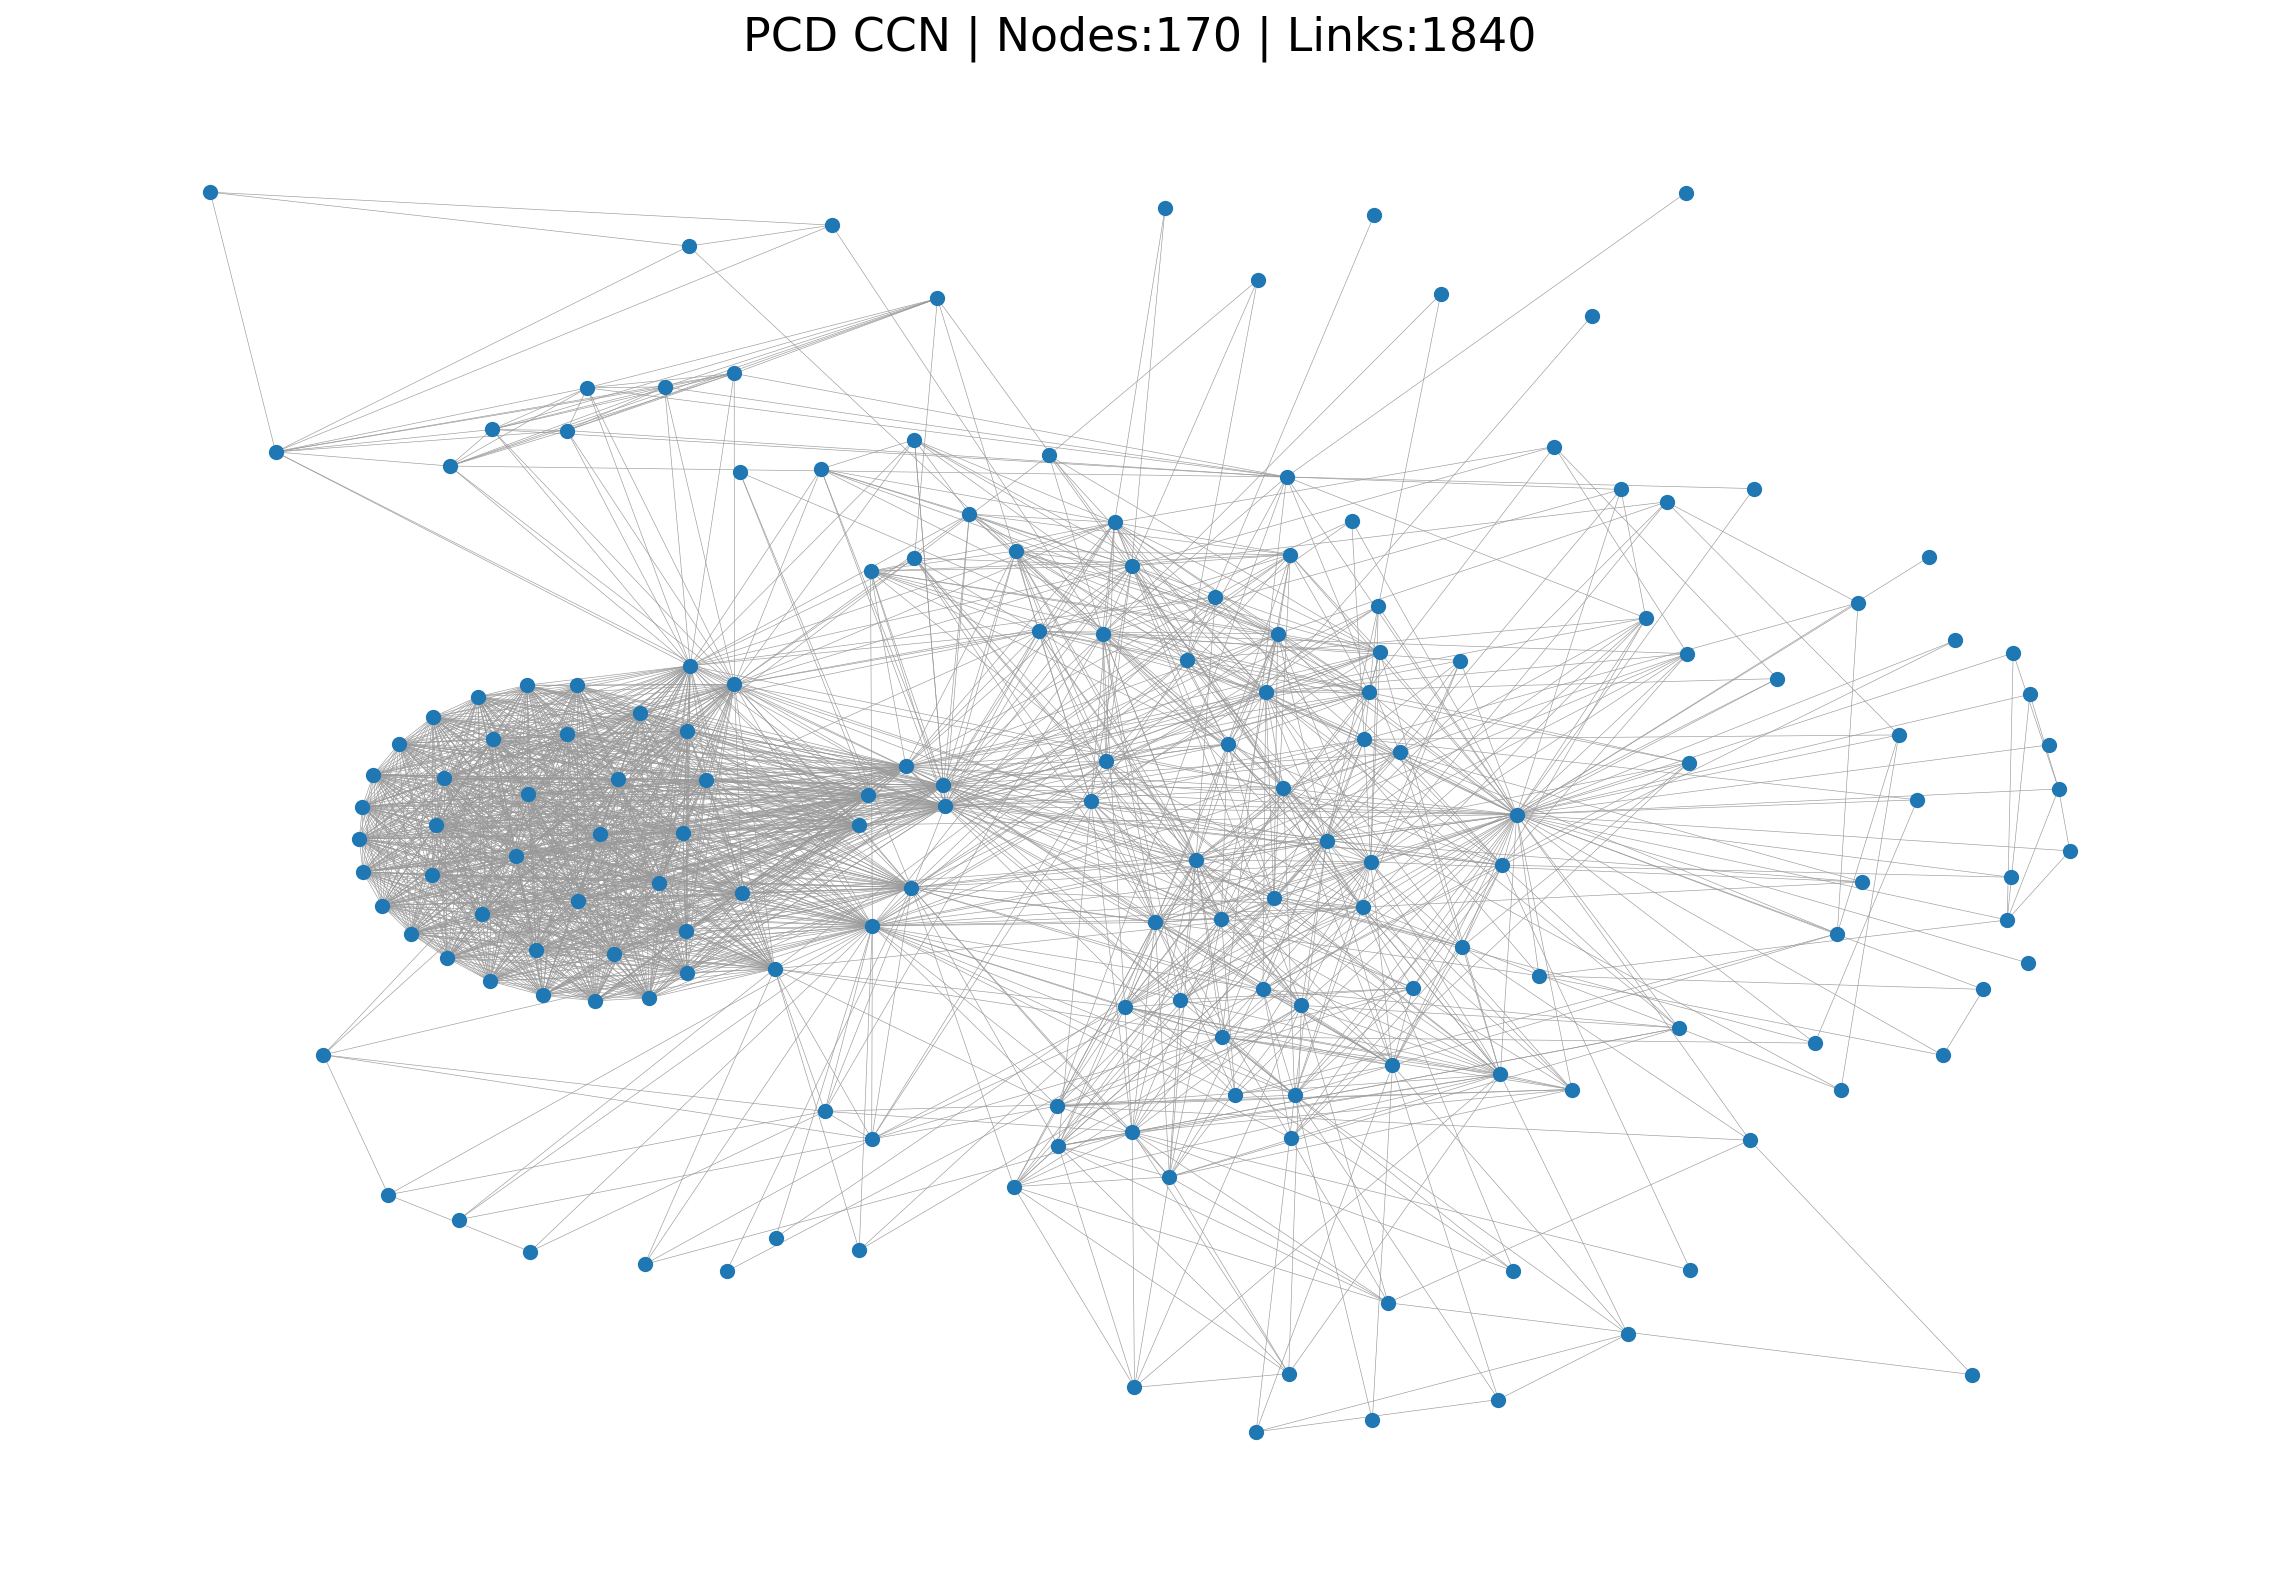

In [14]:
plt.figure(figsize=(15,10),dpi=150)
nx.draw_kamada_kawai(PCD_CCN,with_labels=0,node_size=40,width=0.3,edge_color='#999')
plt.title('PCD CCN | Nodes:'+str(len(PCD_CCN.nodes))+' | Links:'+str(len(G_random_erdos.edges)),fontsize=22)
plt.tight_layout()
plt.show()

# Ploting networks with impacting genes

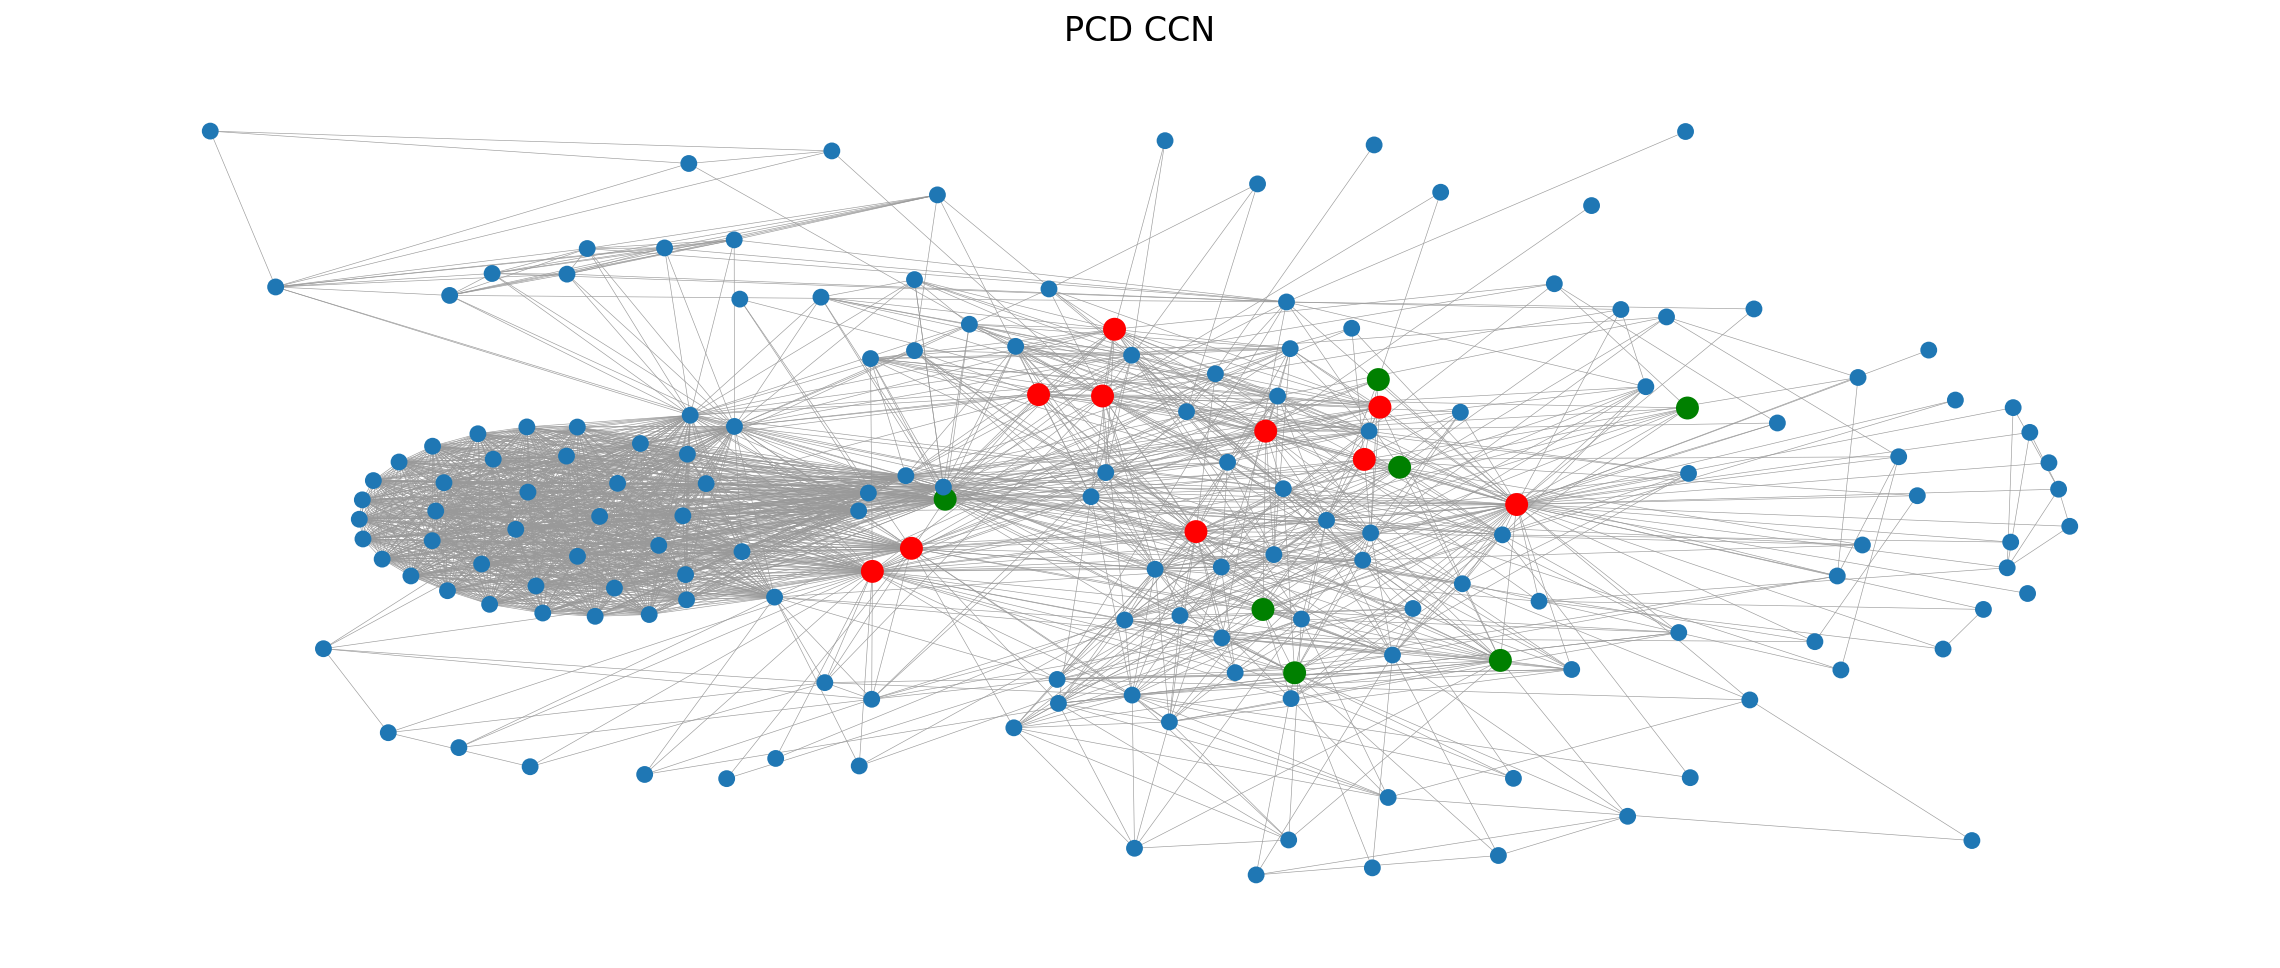

In [9]:
PCD_impactingDrivers = ["AKT1", "CTNNB1", "RIPK1", "STAT3", "STUB1", "TNFSF10", "HSP90AA1N", "PTK2", "CASP3", "CASP8", "TP53"]
PCD_impactingNonDrivers = ["APAF1", "BAD", "BIRC2", "CASP1", "MAPT", "ROCK1", "CASP6"]

node_colors = []
node_sizes = []
for v in PCD_CCN.nodes:
    if v in PCD_impactingDrivers:
        node_colors.append('red')
        node_sizes.append(100)
    elif v in PCD_impactingNonDrivers:
        node_colors.append('green')
        node_sizes.append(100)
    else:
        node_colors.append('tab:blue')
        node_sizes.append(50)


plt.figure(figsize=(15,6),dpi=150)
pos = nx.kamada_kawai_layout(PCD_CCN)
nx.draw(PCD_CCN,pos=pos, with_labels=0,node_size=node_sizes,width=0.3,edge_color='#999',node_color=node_colors)
plt.title('PCD CCN',fontsize=16)
plt.tight_layout()
plt.show()

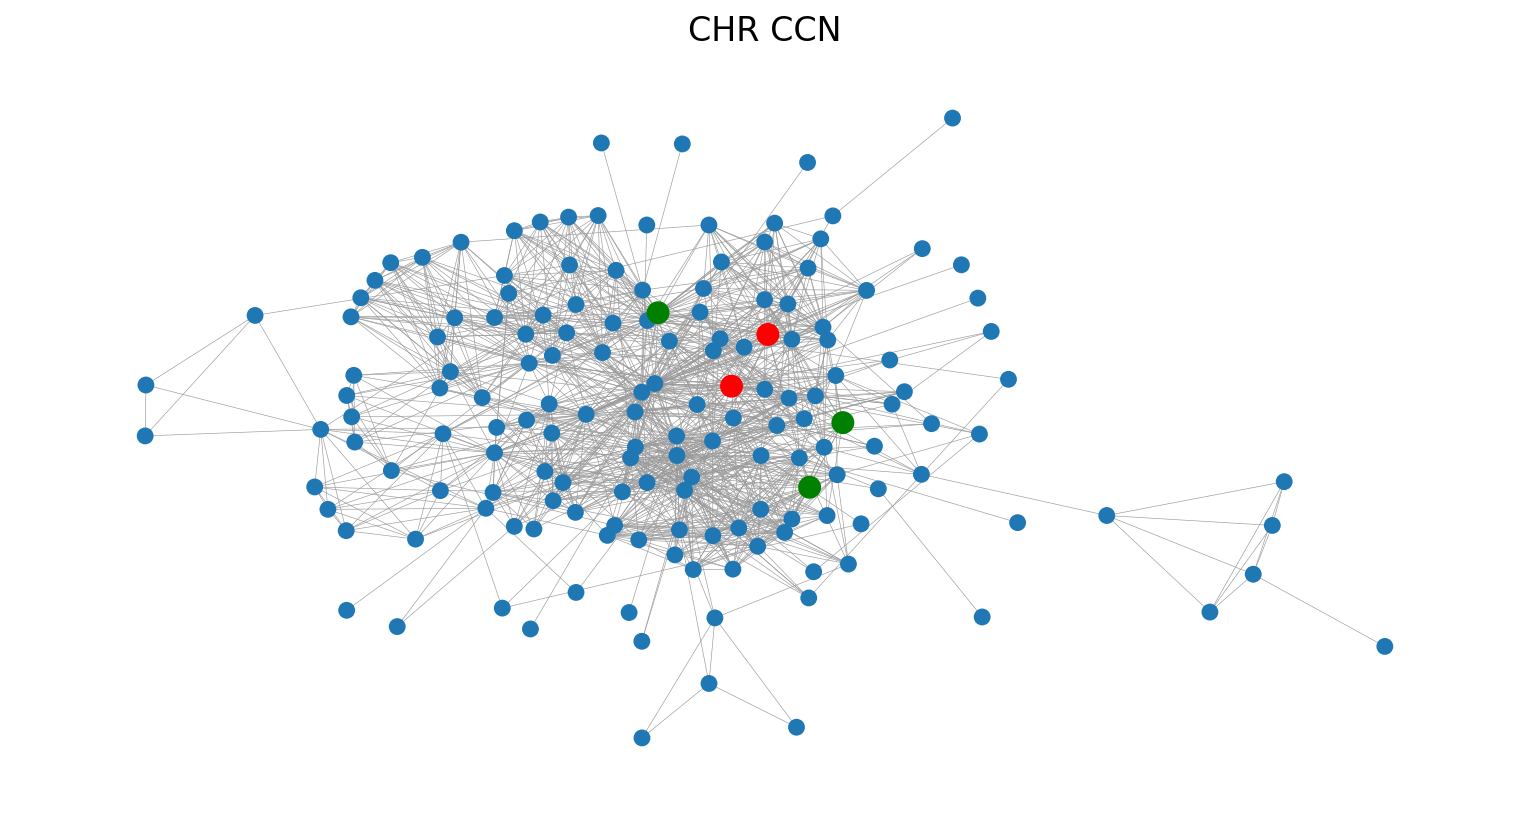

In [11]:
CHR_impactingDrivers = ["RELA", "SMARCE1"]
CHR_impactingNonDrivers = ["ACTL6A", "BRMS1", "WDR77"]

node_colors = []
node_sizes = []
for v in CHR_CCN.nodes:
    if v in CHR_impactingDrivers:
        node_colors.append('red')
        node_sizes.append(100)
    elif v in CHR_impactingNonDrivers:
        node_colors.append('green')
        node_sizes.append(100)
    else:
        node_colors.append('tab:blue')
        node_sizes.append(50)


plt.figure(figsize=(10,5),dpi=150)
pos = nx.kamada_kawai_layout(CHR_CCN)
nx.draw(CHR_CCN,pos=pos, with_labels=0,node_size=node_sizes,width=0.3,edge_color='#999',node_color=node_colors)
plt.title('CHR CCN',fontsize=16)
plt.tight_layout()
plt.show()

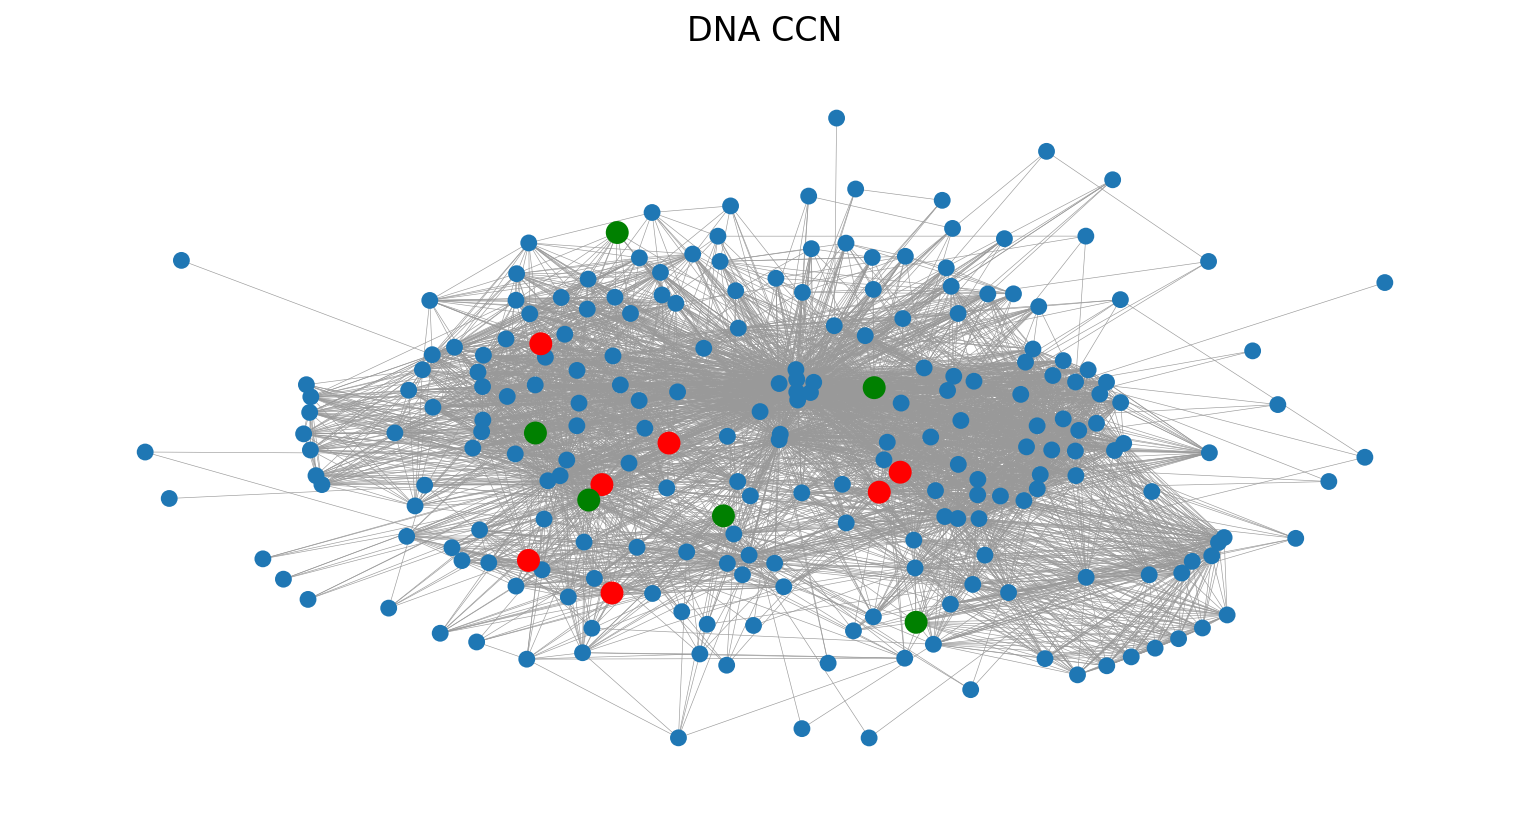

In [12]:
DNA_impactingDrivers = ["ABL1", "ATR", "FANCD2", "HERC2", "XPA", "ATM","EP300"]
DNA_impactingNonDrivers = ["ACTL6A","KAT5", "PCNA", "POLN","RAD51","XRCC6"]

node_colors = []
node_sizes = []
for v in DNA_CCN.nodes:
    if v in DNA_impactingDrivers:
        node_colors.append('red')
        node_sizes.append(100)
    elif v in DNA_impactingNonDrivers:
        node_colors.append('green')
        node_sizes.append(100)
    else:
        node_colors.append('tab:blue')
        node_sizes.append(50)


plt.figure(figsize=(10,5),dpi=150)
pos = nx.kamada_kawai_layout(DNA_CCN)
nx.draw(DNA_CCN,pos=pos, with_labels=0,node_size=node_sizes,width=0.3,edge_color='#999',node_color=node_colors)
plt.title('DNA CCN',fontsize=16)
plt.tight_layout()
plt.show()

# Plotting 3D

In [6]:
def plot3Dnetwork(G,name):
    # Extrair posições dos nós para o layout 3D
    pos = nx.spring_layout(G, dim=3)

    # Extrair coordenadas dos nós para a plotagem
    x_nodes = [pos[i][0] for i in G.nodes()]
    y_nodes = [pos[i][1] for i in G.nodes()]
    z_nodes = [pos[i][2] for i in G.nodes()]

    # Lista das arestas para plotagem
    x_edges = []
    y_edges = []
    z_edges = []

    # Adiciona as coordenadas das arestas
    for edge in G.edges():
        x_edges += [pos[edge[0]][0], pos[edge[1]][0], None]
        y_edges += [pos[edge[0]][1], pos[edge[1]][1], None]
        z_edges += [pos[edge[0]][2], pos[edge[1]][2], None]

    # Cria os traços para os nós
    trace_nodes = go.Scatter3d(
        x=x_nodes, y=y_nodes, z=z_nodes,
        mode='markers',
        marker=dict(size=5, color='blue'),
        text=list(G.nodes()),
        hoverinfo='text'
    )

    # Cria os traços para as arestas
    trace_edges = go.Scatter3d(
        x=x_edges, y=y_edges, z=z_edges,
        mode='lines',
        line=dict(color='black', width=0.5),
        hoverinfo='none'
    )

    # Cria a figura e adiciona os traços
    fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])
    fig.add_trace(trace_edges)
    fig.add_trace(trace_nodes)

    # Configurações da visualização
    fig.update_layout(
        scene=dict(
            xaxis=dict(showbackground=False, title='',showticklabels=False),
            yaxis=dict(showbackground=False, title='',showticklabels=False),
            zaxis=dict(showbackground=False, title='',showticklabels=False)
        ),
        title=name+" 3D Visualization",
        showlegend=False
    )

    # Exportar para HTML
    fig.write_html("5 output/"+name+".html")

In [12]:
plot3Dnetwork(G_random_erdos,"Random")
plot3Dnetwork(PCD_CCN,"PCD CCN")
plot3Dnetwork(CHR_CCN,"CHR CCN")
plot3Dnetwork(DNA_CCN,"DNA CCN")